# 1) Load the data into the pandas environment and identify some basic details of the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


df = pd.read_csv("employee.csv")
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [3]:
df.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [4]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


The Employees are aged between 23-54.

The Employee income ranges between 16000 - 98000.

The Highest performance score is 901 and the Lowest performance score is 53.

# 2. Reset the index as "name".

In [5]:
df = df.set_index("name")
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [6]:
df.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”. 

In [7]:
df2 = df[df["department"].isin(["Sales","Finance"])]
df2

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [8]:
data = df[df["performance_score"] > 700]
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score 

In [9]:
data4 = df[(df["performance_score"] > 500) & (df["performance_score"] < 700)]
data4

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [10]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Handling NaN in 'AGE'

-0.23573446724170385


C:\Users\VN582EN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

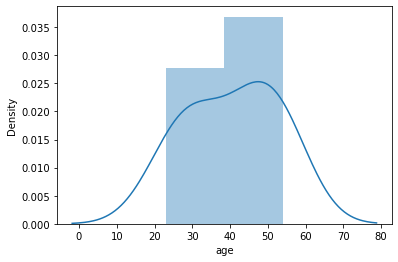

In [11]:
print(df["age"].skew())
sns.distplot(df["age"])

In this case we can proceed to fill the missing values with Mean/Median while age is having null values

In [12]:
df["age"] = df["age"].fillna(df["age"].median())
df.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [13]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Handling NaN in 'Gender'



Since Gender is a categorical feature, so we can use the Mode to fill in the missing values

In [14]:
df_gender = df["gender"].mode()
df_gender

0    F
Name: gender, dtype: object

In [15]:
df["gender"] = df["gender"].fillna("F")
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [16]:
df.isnull().sum()

age                  0
income               2
gender               0
department           0
grade                0
performance_score    0
dtype: int64

We have handled all the missing values in the Dataset

# 8. Check the outliers and handle outliers in performance score using Percentiles. 

In [17]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


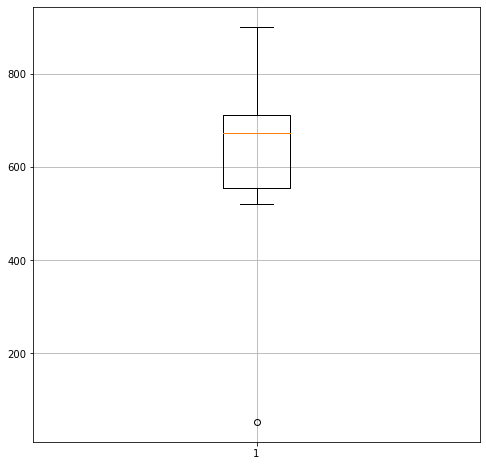

In [18]:
plt.figure(figsize=(8,8))
plt.boxplot(df["performance_score"])
plt.grid();

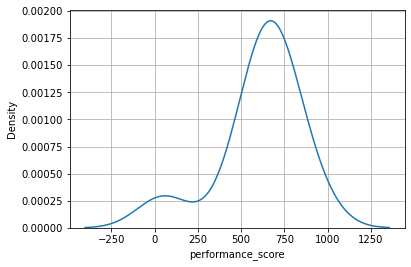

In [19]:
sns.kdeplot(df["performance_score"])
plt.grid()

In [20]:
df["performance_score"].skew()

-1.7947713470359914

In [21]:
Q1 = np.percentile(df["performance_score"],25)
Q2 = np.percentile(df["performance_score"],50)
Q3 = np.percentile(df["performance_score"],75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in df["performance_score"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = df[(df["performance_score"] < lower_limit) | (df["performance_score"] > upper_limit)].index
df.drop(index_dropped,inplace=True)
df

The first Quartile = 556.0,
The Second Quartile = 674.0, 
The Third Quartile = 711.0, 
IQR = 155.0, 

lower limit = 323.5,
upper limit = 943.5

The outliers are = [53]


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


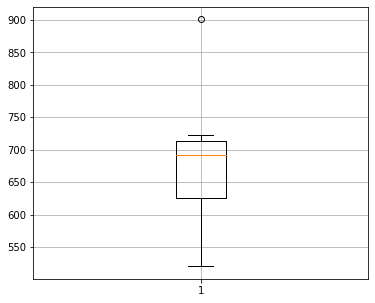

In [22]:
plt.figure(figsize=(6,5))
plt.boxplot(df["performance_score"])
plt.grid();

We have now cleared the outliers in the performance score feature.

# 9. Check the gender column and do Dummy encoding.

In [23]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [24]:
dummy_df = pd.get_dummies(df, columns=["gender"])
dummy_df


,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,NaN,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score.

In [25]:
col_names = ["age","income","department","grade",'performance_score',"gender_F","gender_M"]
features = dummy_df[col_names]

# Column transforming
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['performance_score'])
    ], remainder='passthrough')

ct.fit_transform(features)
# Transforming the array back into Data Frame.
x_SS= pd.DataFrame(ct.fit_transform(features))

# Re-assigning the column names and index names
x_SS.columns = ['performance_score',"age","income","department","grade","gender_F","gender_M"]
x_SS.index = ["Allen Smith","S Kumar","Jack Morgan","Ying Chin","Dheeraj Patel","Satyam Sharma","Josh Wills","Leo Duck"]
x_SS

,performance_score,age,income,department,grade,gender_F,gender_M
Allen Smith,0.392262,45.0,NaN,Operations,G3,1,0
S Kumar,-1.475872,45.0,16000.0,Finance,G0,1,0
Jack Morgan,-0.058667,32.0,35000.0,Finance,G2,0,1
Ying Chin,-1.144578,45.0,65000.0,Sales,G3,1,0
Dheeraj Patel,0.281831,30.0,42000.0,Operations,G2,1,0
Satyam Sharma,-0.288733,45.0,62000.0,Sales,G3,1,0
Josh Wills,2.030331,54.0,52000.0,Finance,G3,1,0
Leo Duck,0.263425,23.0,98000.0,Sales,G4,0,1


Performed Standard Scaling based on Performance score